In [1]:
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv("BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
df.shape

(537577, 12)

In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [10]:
df.shape

(164278, 12)

In [11]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [12]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,13055


In [20]:
df["User_ID"].nunique()

5868

In [21]:
df["Product_ID"].nunique()

526

In [23]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [24]:
df["Age"].unique()

array(['0-17', '46-50', '26-35', '51-55', '36-45', '18-25', '55+'],
      dtype=object)

In [25]:
df["Occupation"].unique()

array([10,  7, 20,  9,  1, 12, 17,  0,  3, 15,  4, 11,  8, 16, 19,  2, 14,
       13,  6,  5, 18], dtype=int64)

In [26]:
df["City_Category"].unique()

array(['A', 'B', 'C'], dtype=object)

In [27]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '1', '4+', '0', '3'], dtype=object)

In [28]:
df["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [29]:
df["Product_Category_1"].unique()

array([ 1,  5,  2,  6,  3,  4,  8, 12, 11, 10, 15, 13], dtype=int64)

In [32]:
df["Purchase"].sum()

1915646035

In [36]:
for i in df.columns:
    print(i ,":", df[i].nunique())

User_ID : 5868
Product_ID : 526
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 12
Purchase : 13839


In [41]:
data = pd.DataFrame({'Ratio' : [len(df[df["Gender"] == "M"]), len(df[df["Gender"] == "F"])]}, index = ['Male', 'Female'])

In [42]:
data

,Ratio
Male,127346
Female,36932


<Axes: ylabel='Ratio'>

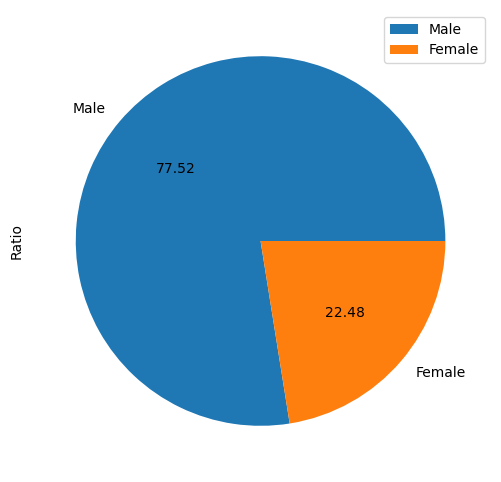

In [43]:
data.plot.pie(y = "Ratio", figsize = (6,6), autopct = '%.2f')

<Axes: title={'center': 'Gender Ratio'}>

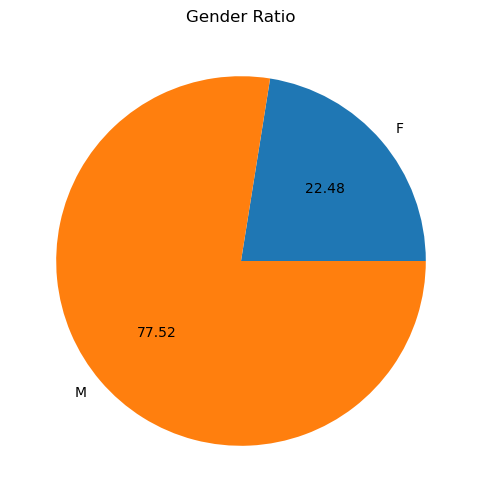

In [46]:
df.groupby("Gender").size().plot(kind = 'pie', title = "Gender Ratio",autopct = '%.2f', figsize = (6,6))

<Axes: ylabel='Purchase'>

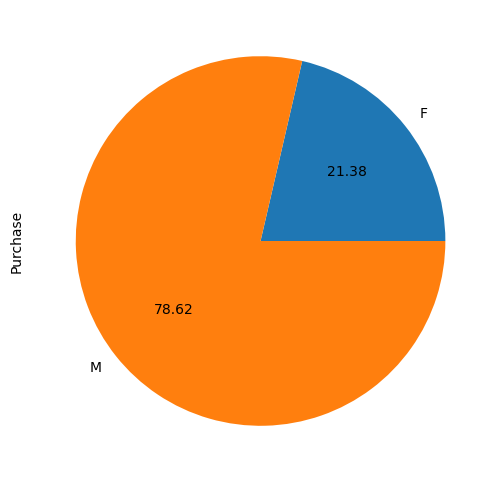

In [52]:
df.groupby("Gender").sum()['Purchase'].plot(kind = 'pie',autopct = '%.2f', figsize = (6,6))

<Axes: title={'center': 'Purchase Distribution by age'}, xlabel='Age'>

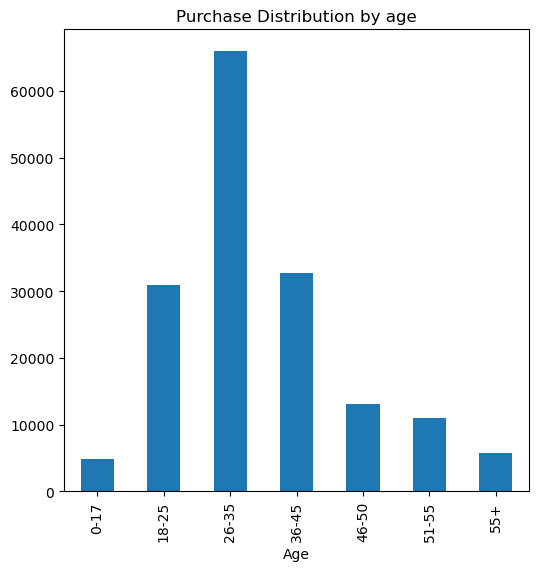

In [54]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (6,6), title = 'Purchase Distribution by age')

In [56]:
for i in df['Age'].unique():
    print(i, ":", len(df[df['Age'] == i]))

0-17 : 4789
46-50 : 13135
26-35 : 65916
51-55 : 11018
36-45 : 32758
18-25 : 30889
55+ : 5773


In [58]:
for i in df['Age'].unique():
    print(i, ":", df[df['Age'] == i]['Product_ID'].nunique())

0-17 : 452
46-50 : 507
26-35 : 524
51-55 : 491
36-45 : 521
18-25 : 515
55+ : 459


In [63]:
lst =[]
for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])
data = pd.DataFrame(lst, columns = ['Age', 'Product'])

In [64]:
data

,Age,Product
0,0-17,452
1,46-50,507
2,26-35,524
3,51-55,491
4,36-45,521
5,18-25,515
6,55+,459


<Axes: xlabel='Age'>

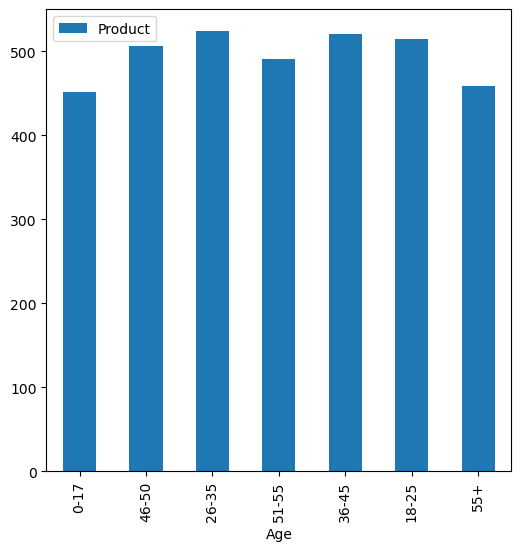

In [66]:
data.plot.bar(x ='Age', figsize = (6,6))

<Axes: title={'center': 'Amount spend by age'}, xlabel='Age'>

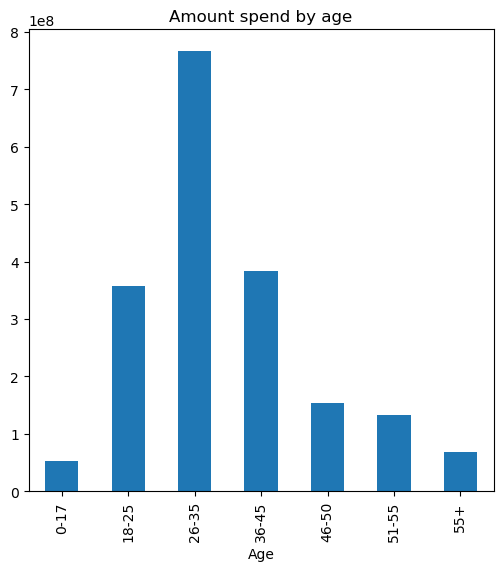

In [69]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize =(6,6), title = 'Amount spend by age')

<Axes: xlabel='Age', ylabel='count'>

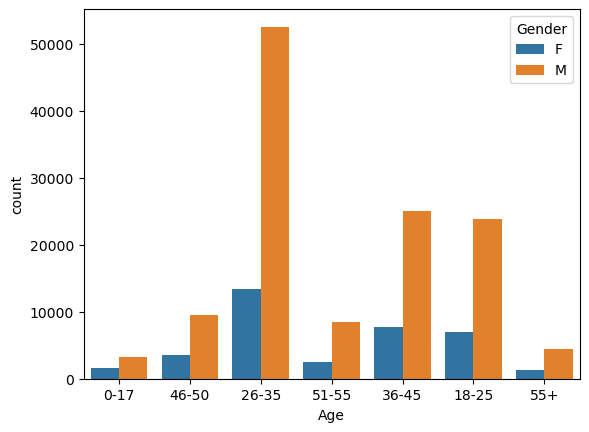

In [71]:
sb.countplot(data = df, x = "Age", hue = "Gender")

<Axes: xlabel='Age', ylabel='count'>

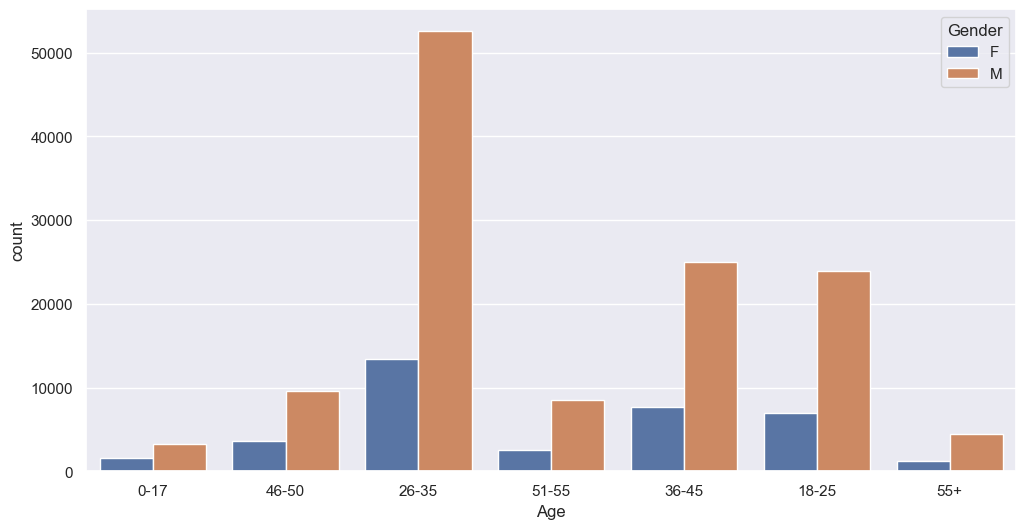

In [72]:
sb.set(rc = {"figure.figsize" : (12,6)})
sb.countplot(data = df, x = "Age", hue = "Gender")


<Axes: xlabel='Gender', ylabel='count'>

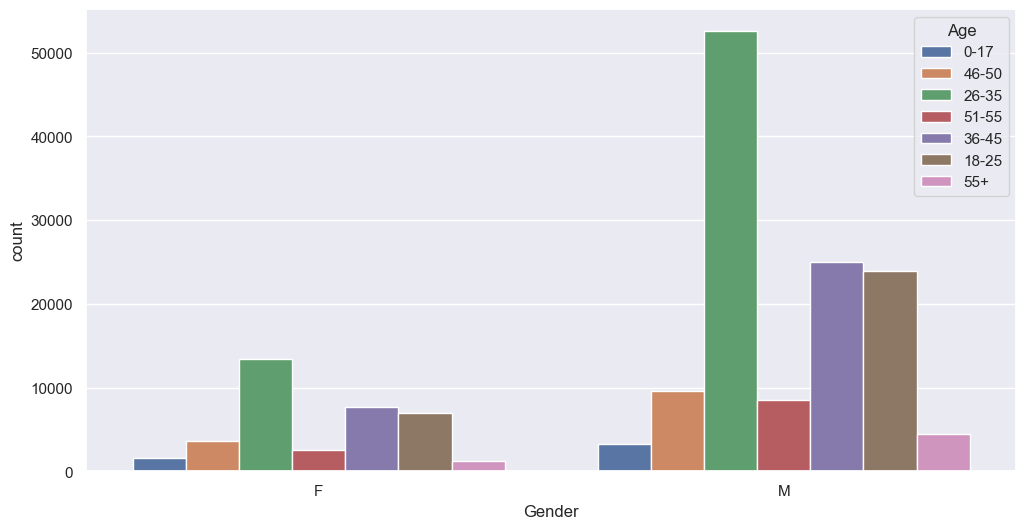

In [73]:
sb.set(rc = {"figure.figsize" : (12,6)})
sb.countplot(data = df, x = "Gender", hue = "Age")


<Axes: xlabel='Gender', ylabel='count'>

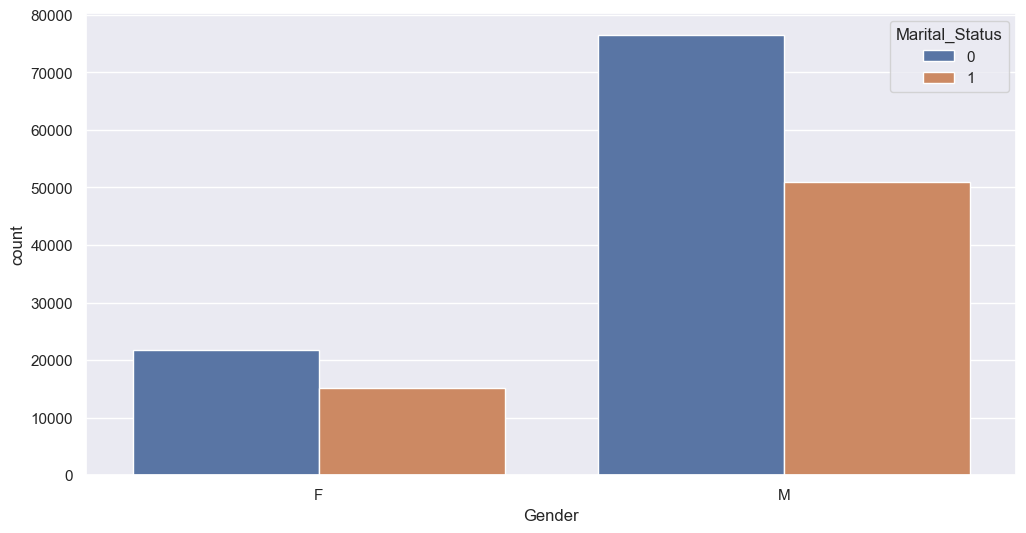

In [76]:
sb.set(rc = {"figure.figsize" : (12,6)})
sb.countplot(data = df, x = "Gender", hue = "Marital_Status")

<Axes: xlabel='Gender', ylabel='count'>

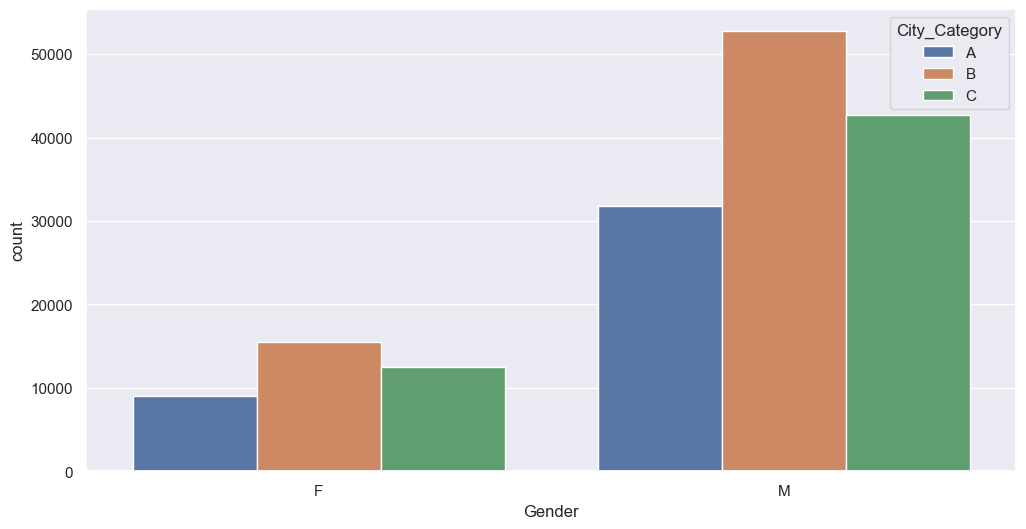

In [77]:
sb.set(rc = {"figure.figsize" : (12,6)})
sb.countplot(data = df, x = "Gender", hue = "City_Category")

<Axes: >

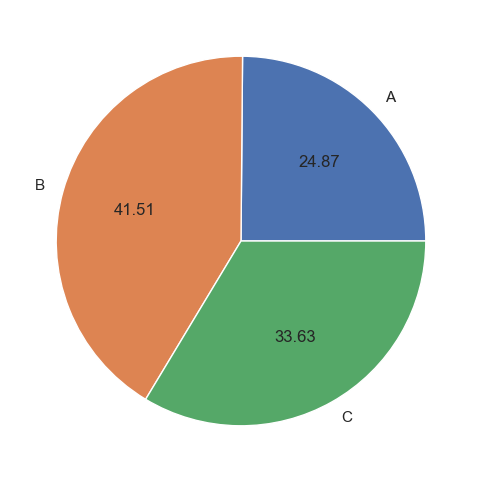

In [78]:
df.groupby("City_Category").size().plot(kind = 'pie', autopct = '%.2f')

<Axes: xlabel='City_Category', ylabel='count'>

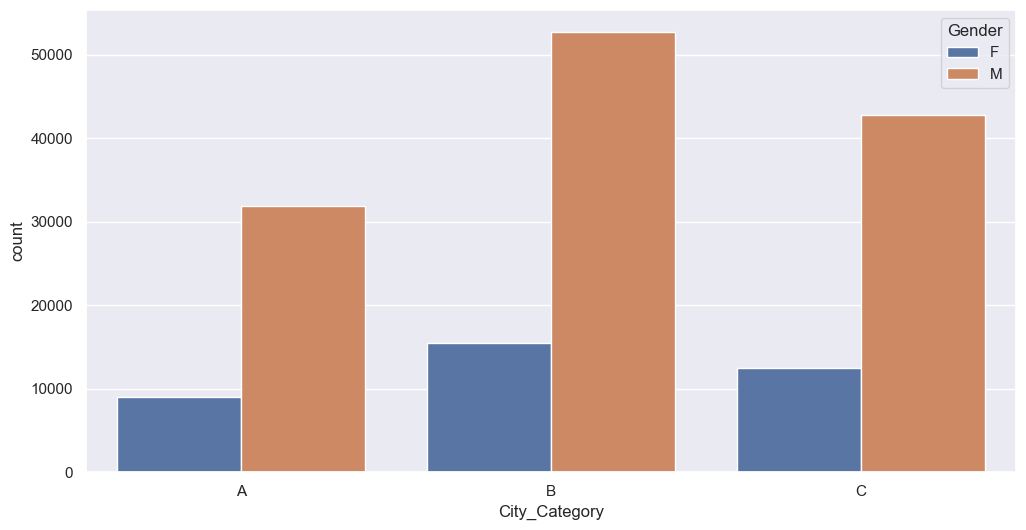

In [79]:
sb.countplot(data = df, x = "City_Category", hue = "Gender")

<Axes: ylabel='Purchase'>

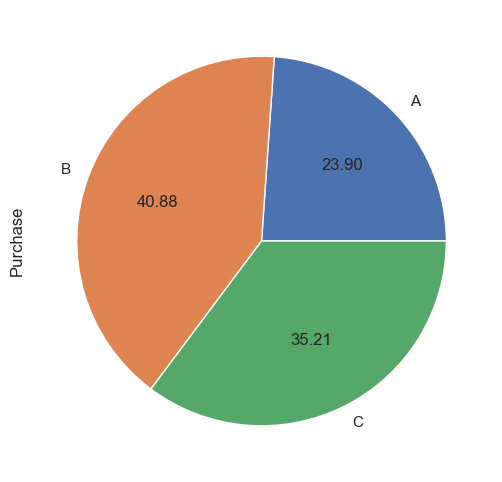

In [83]:
df.groupby("City_Category").sum()["Purchase"].plot(kind = 'pie', autopct = '%.2f')

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

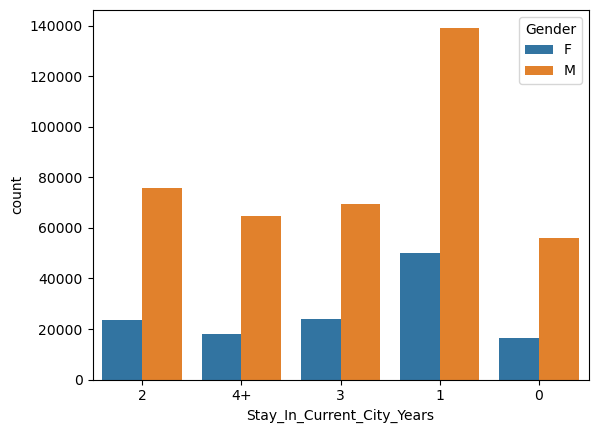

In [10]:
sb.countplot(x = 'Stay_In_Current_City_Years', hue = "Gender", data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

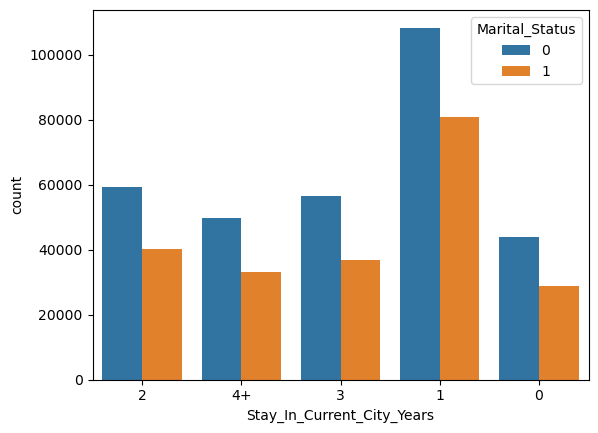

In [12]:
sb.countplot(x = 'Stay_In_Current_City_Years', hue = "Marital_Status", data = df)

<Axes: >

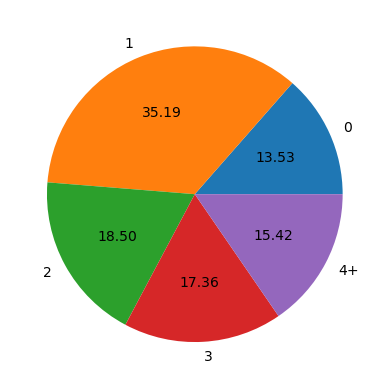

In [13]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = '%.2f')

<Axes: ylabel='Purchase'>

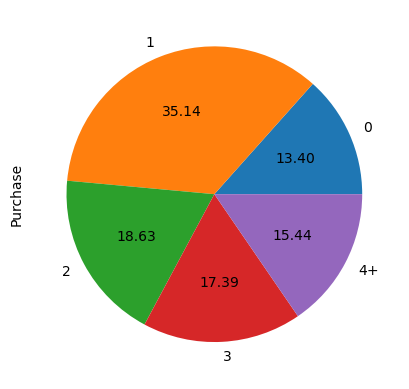

In [14]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'pie', autopct = '%.2f')

<Axes: xlabel='Occupation', ylabel='count'>

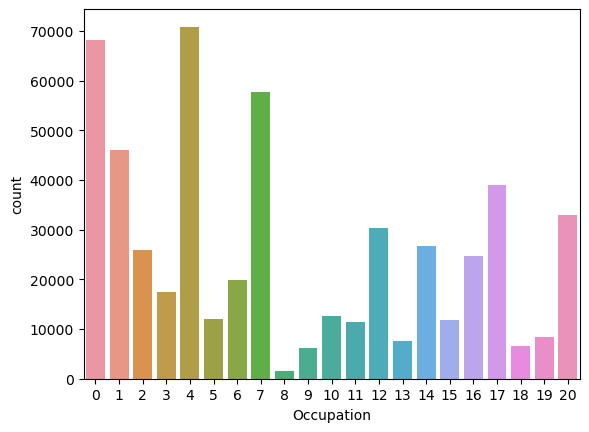

In [15]:
sb.countplot(x = 'Occupation', data = df)

<Axes: xlabel='Occupation'>

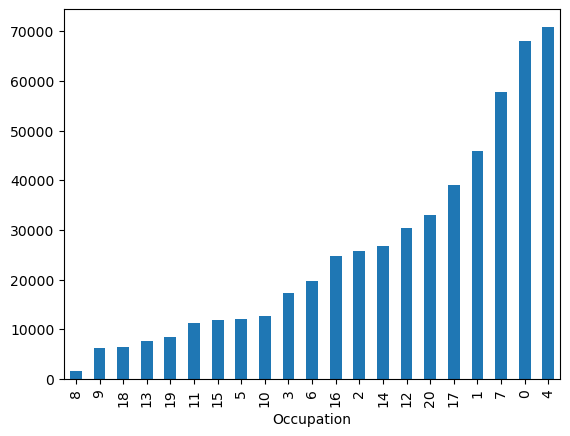

In [18]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

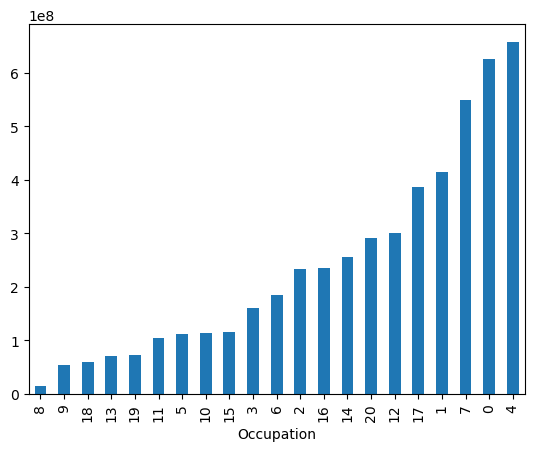

In [19]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

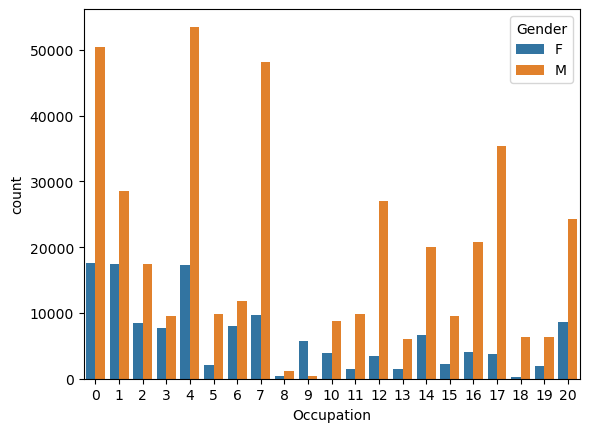

In [4]:
sb.countplot(x = 'Occupation', hue = 'Gender', data = df)

<Axes: xlabel='Occupation'>

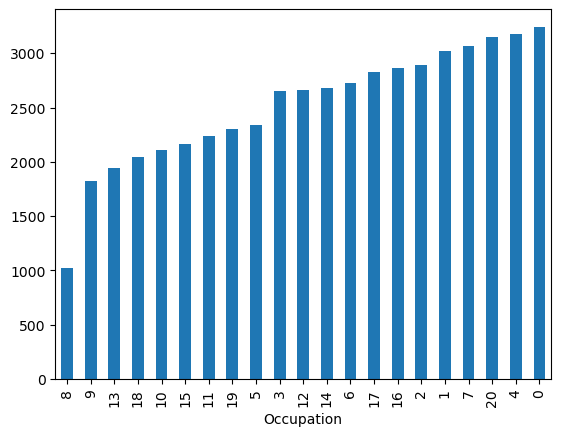

In [6]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

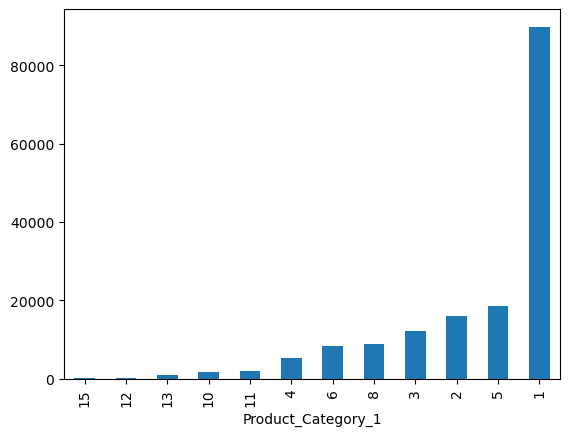

In [14]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

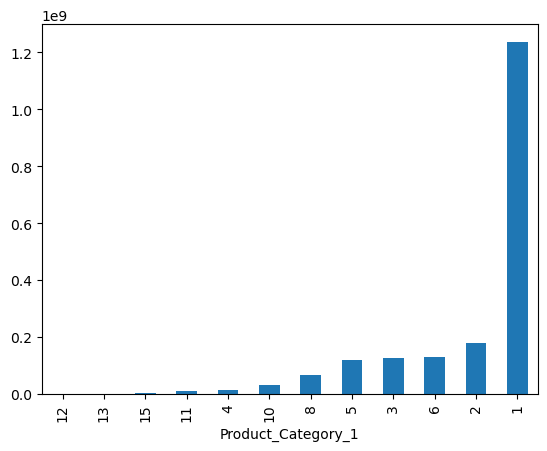

In [16]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

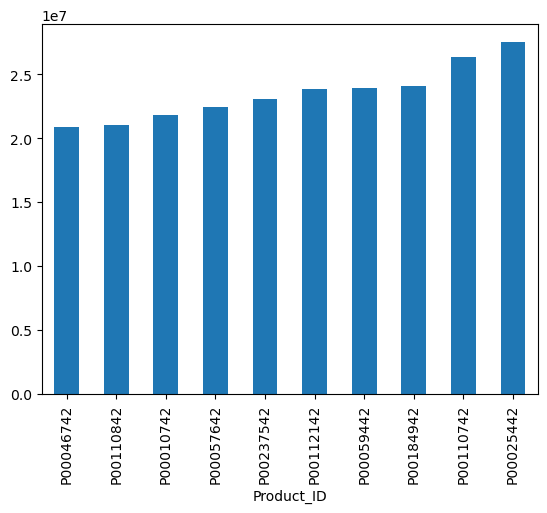

In [18]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

In [19]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,13055


In [22]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = l

KeyError: 0

In [ ]:
df.head()